# MEMORIA PROYECTO ML

## Estructurade la memoria:


#### I. Introducción

* Contexto del problema a resolver y justificación de la necesidad
* Objetivos y alcance del proyecto

#### II. Dataset
##### 2.1 Descripción del dataset utilizado (origen, tamaño, variables, etc.)
##### 2,2 Análisis exploratorio de los datos (EDA)

#### III. Preprocesamiento de los datos

##### 3.1 Verificación de la calidad de los datos
##### 3.2 Decisiones, imputaciones y transformación de variables

#### IV. Modelado

#### 4.1 Modelados univariantes

#### 4.2 Modelados multivariantes 

#### V. Predicción y resultados finales

* Descripción de la solución final y su impacto en el negocio
* Visualización de los resultados finales y predicciones

#### VI. Conclusiones y futuros pasos

* Análisis de los resultados y fortalezas/debilidades del proyecto
* Propuesta de futuras mejoras y optimizaciones

In [2788]:
# Básicos
# ==============================================================================

import pandas as pd
import numpy as np
import pickle
import datetime as dt
import scipy
from utils import funciones as fun

# Tratamiento de datos
# ==============================================================================

import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
from pandas.plotting import autocorrelation_plot

#Financiero
import yfinance as yf
import quantstats as qs
import ta

# Preprocesado y modelado
# ==============================================================================

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, root_mean_squared_error, mean_squared_error
from prophet import Prophet
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Initialize plotly
init_notebook_mode(connected=True)

## I. Introducción

## II. Dataset

In [2789]:
buffet=yf.download('BRK-B',start ="2020-06-01", end="2024-06-01")
msft=yf.download('MSFT',start ="2020-06-01", end="2024-06-01")
apple=yf.download('AAPL',start ="2020-06-01", end="2024-06-01")
meta=yf.download('META',start ="2020-06-01", end="2024-06-01")
google=yf.download('GOOG',start ="2020-06-01", end="2024-06-01")
amazon=yf.download('AMZN',start ="2020-06-01", end="2024-06-01")
nvidia=yf.download('NVDA',start ="2020-06-01", end="2024-06-01")
index_sp500=pd.read_csv('data/sp500_index.csv')


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2790]:
buffet=buffet.reset_index()
msft=msft.reset_index()
apple=apple.reset_index()
meta=meta.reset_index()
google=google.reset_index()
amazon=amazon.reset_index()
nvidia=nvidia.reset_index()
index_sp500=index_sp500.reset_index()

### CREACION COLUMNAS DATE TIME Y AÑO

In [2791]:
#A PARTIR DEL DATE OBJECT LO PASAMOS A DATETIME Y GENERAMOS LA COLUMNA DATETIME
buffet['Date']=pd.to_datetime(buffet['Date'])



In [2792]:
index_sp500=index_sp500.drop(columns='index')
index_sp500['Date']=pd.to_datetime(index_sp500['Date'])
index_sp500=index_sp500.query("'2020-06-01' <= `Date` <= '2024-05-31'")
index_sp500.tail(20)

,Date,S&P500
2498,2024-05-03,5127.79
2499,2024-05-06,5180.74
2500,2024-05-07,5187.70
2501,2024-05-08,5187.67
2502,2024-05-09,5214.08
2503,2024-05-10,5222.68
2504,2024-05-13,5221.42
2505,2024-05-14,5246.68
2506,2024-05-15,5308.15
2507,2024-05-16,5297.10


In [2793]:

msft['Date']=pd.to_datetime(msft['Date'])

apple['Date']=pd.to_datetime(apple['Date'])

meta['Date']=pd.to_datetime(meta['Date'])

google['Date']=pd.to_datetime(google['Date'])

amazon['Date']=pd.to_datetime(amazon['Date'])

nvidia['Date']=pd.to_datetime(nvidia['Date'])

In [2794]:
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1003,2024-05-24,427.190002,431.059998,424.410004,430.160004,430.160004,11845800
1004,2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15718000
1005,2024-05-29,425.690002,430.940002,425.690002,429.170013,429.170013,15517100
1006,2024-05-30,424.299988,424.299988,414.239990,414.670013,414.670013,28424800
1007,2024-05-31,416.750000,416.750000,404.510010,415.130005,415.130005,47995300


Hacemos un rename antes de concat

In [2795]:
msft=msft.rename(columns = {'Open':'Open_Msft','High':'High_Msft','Low':'Low_Msft','Adj Close':'Adj Close_Msft',
                                            'Volume':'Volumen_Msft'})

In [2796]:
msft.head()

,Date,Open_Msft,High_Msft,Low_Msft,Close,Adj Close_Msft,Volumen_Msft
0,2020-06-01,182.539993,183.000000,181.460007,182.830002,176.509796,22622400
1,2020-06-02,184.250000,185.000000,181.350006,184.910004,178.517899,30794600
2,2020-06-03,184.820007,185.940002,183.580002,185.360001,178.952332,27311000
3,2020-06-04,184.300003,185.839996,182.300003,182.919998,176.596649,28761800
4,2020-06-05,182.619995,187.729996,182.009995,187.199997,180.728699,39893600


In [2797]:
apple=apple.rename(columns = {'Open':'Open_Aapl','High':'High_Aapl','Low':'Low_Aapl','Adj Close':'Adj Close_Aapl',
                                            'Volume':'Volumen_Aapl'})

meta=meta.rename(columns = {'Open':'Open_Meta','High':'High_Meta','Low':'Low_Meta','Adj Close':'Adj Close_Meta',
                                            'Volume':'Volumen_Meta'})

google=google.rename(columns = {'Open':'Open_Goog','High':'High_Goog','Low':'Low_Goog','Adj Close':'Adj Close_Goog',
                                            'Volume':'Volumen_Goog'})

amazon=amazon.rename(columns = {'Open':'Open_Amz','High':'High_Amz','Low':'Low_Amz','Adj Close':'Adj Close_Amz',
                                            'Volume':'Volumen_Amz'})

nvidia=nvidia.rename(columns = {'Open':'Open_Nvda','High':'High_Nvda','Low':'Low_Nvda','Adj Close':'Adj Close_Nvda',
                                            'Volume':'Volumen_Nvda'})

Concatenamos todo para generar nuestro dataframe objeto de estudio

In [2798]:
nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1008 non-null   datetime64[ns]
 1   Open_Nvda       1008 non-null   float64       
 2   High_Nvda       1008 non-null   float64       
 3   Low_Nvda        1008 non-null   float64       
 4   Close           1008 non-null   float64       
 5   Adj Close_Nvda  1008 non-null   float64       
 6   Volumen_Nvda    1008 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [2799]:
df = msft.merge(apple, on='Date', how='outer',suffixes=('_Msft', '_Apple'))\
    .merge(meta, on='Date', how='outer',suffixes=('_Apple', '_Meta'))\
    .merge(google, on='Date', how='outer',suffixes=('_Meta', '_Goog'))\
    .merge(amazon, on='Date', how='outer',suffixes=('_Goog', '_Amz'))\
    .merge(nvidia, on='Date', how='outer',suffixes=('_Amz', '_Nvda'))\
    .merge(index_sp500, on='Date', how='outer')
    #Añadimos nuestro target al final 
df.head()

,Date,Open_Msft,High_Msft,Low_Msft,Close_Msft,Adj Close_Msft,Volumen_Msft,Open_Aapl,High_Aapl,Low_Aapl,...,Close_Amz,Adj Close_Amz,Volumen_Amz,Open_Nvda,High_Nvda,Low_Nvda,Close_Nvda,Adj Close_Nvda,Volumen_Nvda,S&P500
0,2020-06-01,182.539993,183.000000,181.460007,182.830002,176.509796,22622400,79.437500,80.587502,79.302498,...,123.552002,123.552002,58578000,88.332497,88.407501,86.894997,88.062500,87.768082,38987600,3055.73
1,2020-06-02,184.250000,185.000000,181.350006,184.910004,178.517899,30794600,80.187500,80.860001,79.732498,...,123.620499,123.620499,50598000,87.962502,88.372498,86.580002,88.252502,87.957443,39132000,3080.82
2,2020-06-03,184.820007,185.940002,183.580002,185.360001,178.952332,27311000,81.165001,81.550003,80.574997,...,123.919998,123.919998,53420000,88.222504,88.662498,87.000000,87.695000,87.401810,36544000,3122.87
3,2020-06-04,184.300003,185.839996,182.300003,182.919998,176.596649,28761800,81.097504,81.404999,80.195000,...,123.029999,123.029999,58974000,87.279999,89.432503,86.775002,87.665001,87.411774,42428000,3112.35
4,2020-06-05,182.619995,187.729996,182.009995,187.199997,180.728699,39893600,80.837502,82.937500,80.807503,...,124.150002,124.150002,66128000,87.945000,89.970001,87.080002,89.199997,88.942337,48174800,3193.93


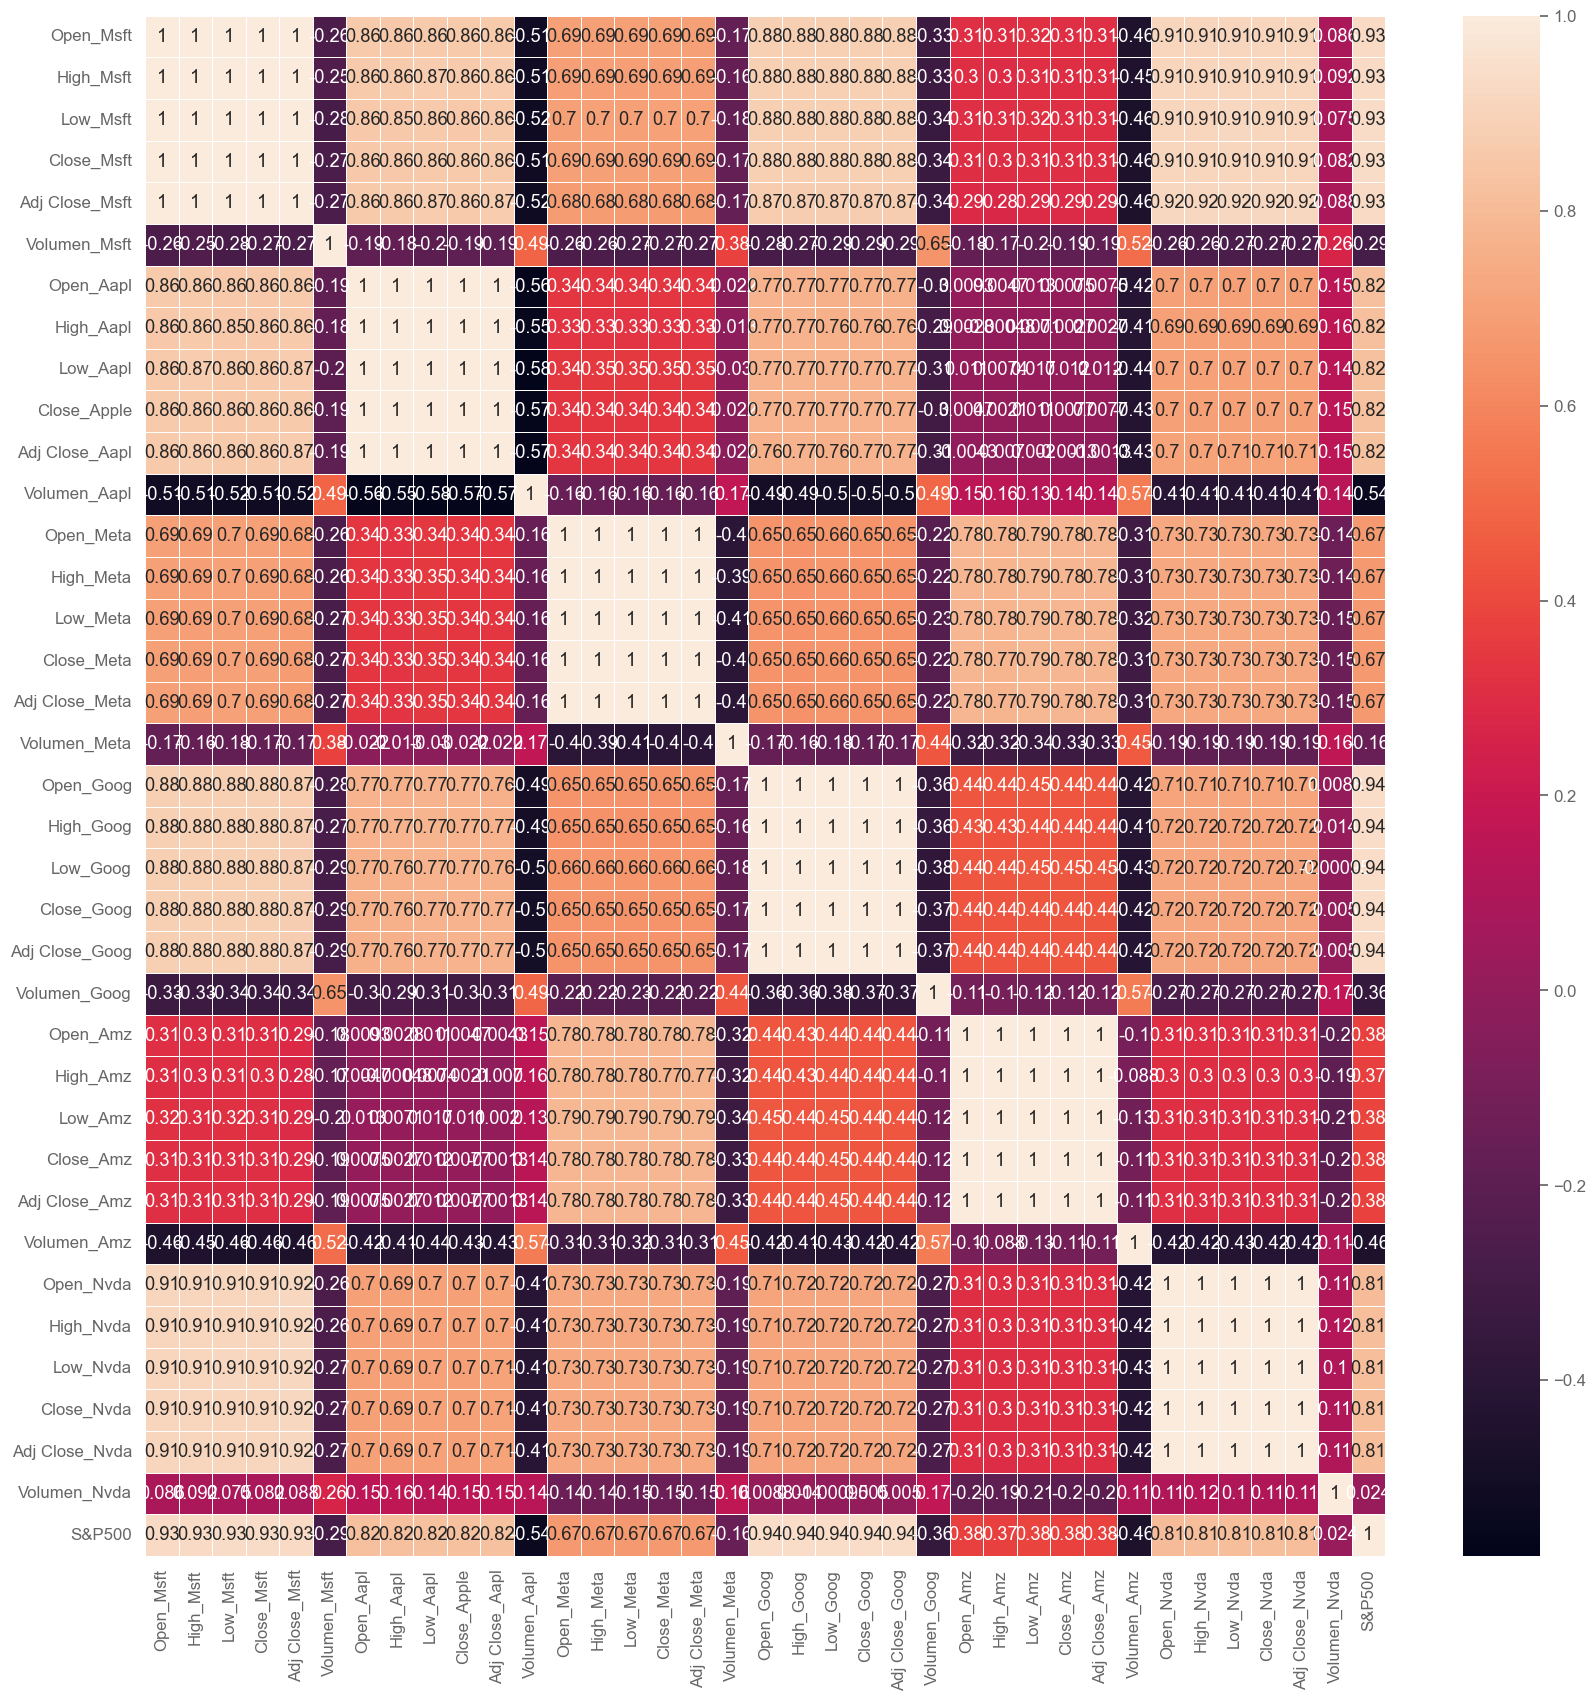

In [2800]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            linewidths=.5);

In [2801]:
fun.data_report(df)

COL_N,Date,Open_Msft,High_Msft,Low_Msft,Close_Msft,Adj Close_Msft,Volumen_Msft,Open_Aapl,High_Aapl,Low_Aapl,...,Close_Amz,Adj Close_Amz,Volumen_Amz,Open_Nvda,High_Nvda,Low_Nvda,Close_Nvda,Adj Close_Nvda,Volumen_Nvda,S&P500
DATA_TYPE,datetime64[ns],float64,float64,float64,float64,float64,int64,float64,float64,float64,...,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,1008,987,967,978,979,1000,1005,947,951,961,...,985,985,1004,995,994,998,999,1003,1008,1007
CARDIN (%),100.0,97.92,95.93,97.02,97.12,99.21,99.7,93.95,94.35,95.34,...,97.72,97.72,99.6,98.71,98.61,99.01,99.11,99.5,100.0,99.9


Como vemos en la matriz de correlación, no solo será necesario usar el precio de close ya que el resto de valores son completamente depentes linealmente. También usaremos el volumen ya que tiene mayor indepencia.

In [2802]:
df_opt=df[['Date', 'Close_Msft', 'Volumen_Msft','Close_Apple','Volumen_Aapl','Close_Meta','Volumen_Meta','Close_Goog','Volumen_Goog','Close_Amz','Volumen_Amz','Close_Nvda','Volumen_Nvda','S&P500']]
df_opt.tail()

,Date,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda,S&P500
1003,2024-05-24,430.160004,11845800,189.979996,36294600,478.220001,12012300,176.330002,11400600,180.750000,27434100,1064.689941,42650200,5304.72
1004,2024-05-28,430.320007,15718000,189.990005,52280100,479.920013,10175800,178.020004,15655300,182.149994,29927000,1139.010010,65272800,5306.04
1005,2024-05-29,429.170013,15517100,190.289993,53068000,474.359985,9226200,177.399994,15023800,182.020004,32009300,1148.250000,55744200,5266.95
1006,2024-05-30,414.670013,28424800,191.289993,49947900,467.049988,10735200,173.559998,18844000,179.320007,29249200,1105.000000,48735000,5235.48
1007,2024-05-31,415.130005,47995300,192.250000,75158300,466.829987,16919800,173.960007,28085200,176.440002,58903900,1096.329956,61326300,5277.51


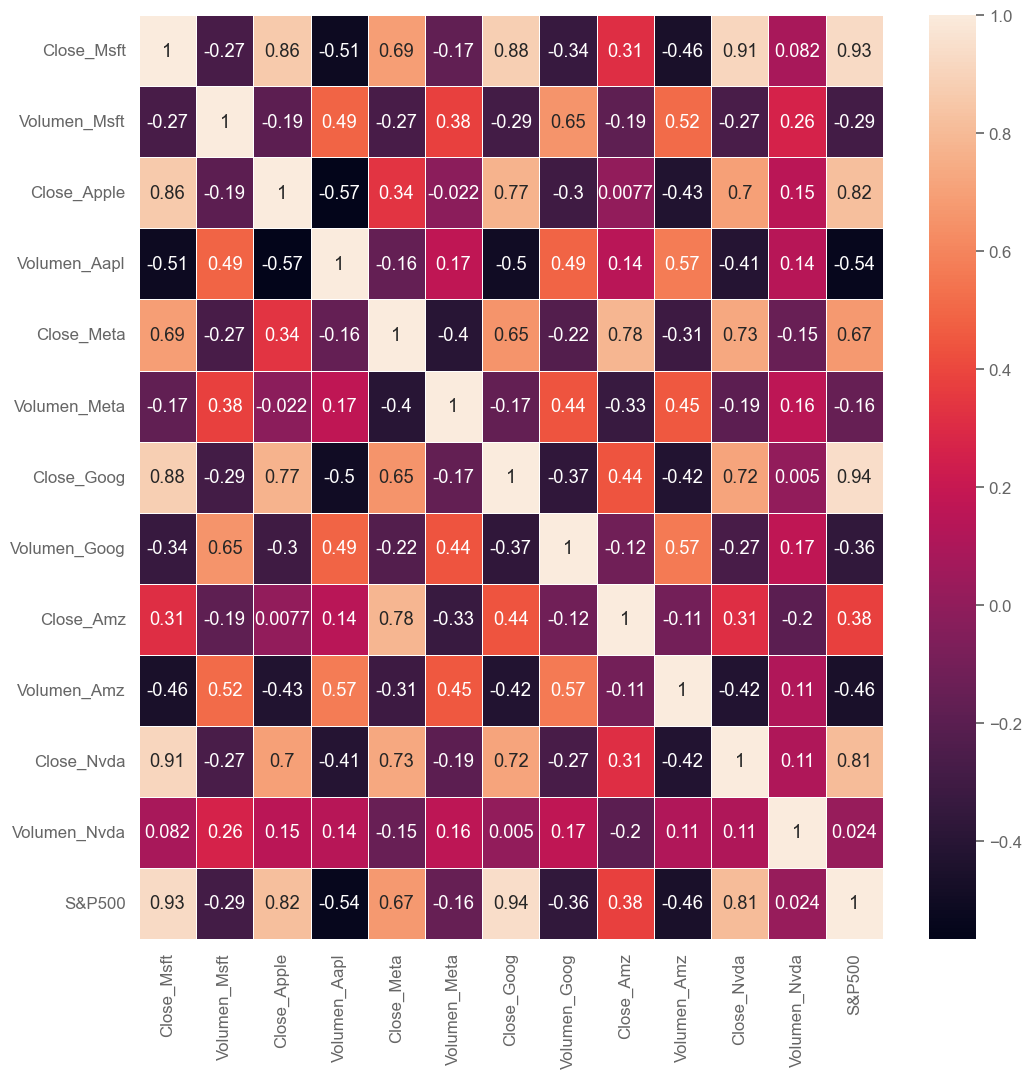

In [2803]:
plt.figure(figsize=(12,12))
sns.heatmap(df_opt.corr(numeric_only=True),
            annot=True,
            linewidths=.5);

Tenemos relaciones fuertes, pero hemos eliminado las dependecias entre las variables. Ahora vamos a los reportes y a representar los valores frente al tiempo

In [2804]:
fun.data_report(df_opt)

COL_N,Date,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda,S&P500
DATA_TYPE,datetime64[ns],float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,1008,979,1005,949,1006,988,1008,987,1001,985,1004,999,1008,1007
CARDIN (%),100.0,97.12,99.7,94.15,99.8,98.02,100.0,97.92,99.31,97.72,99.6,99.11,100.0,99.9


Tenemos un cardinalidad alta por la tendendencia alcista de todos los componentes. No tenemos missings ni valores raros. 

In [2805]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1008 non-null   datetime64[ns]
 1   Close_Msft    1008 non-null   float64       
 2   Volumen_Msft  1008 non-null   int64         
 3   Close_Apple   1008 non-null   float64       
 4   Volumen_Aapl  1008 non-null   int64         
 5   Close_Meta    1008 non-null   float64       
 6   Volumen_Meta  1008 non-null   int64         
 7   Close_Goog    1008 non-null   float64       
 8   Volumen_Goog  1008 non-null   int64         
 9   Close_Amz     1008 non-null   float64       
 10  Volumen_Amz   1008 non-null   int64         
 11  Close_Nvda    1008 non-null   float64       
 12  Volumen_Nvda  1008 non-null   int64         
 13  S&P500        1008 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 110.4 KB


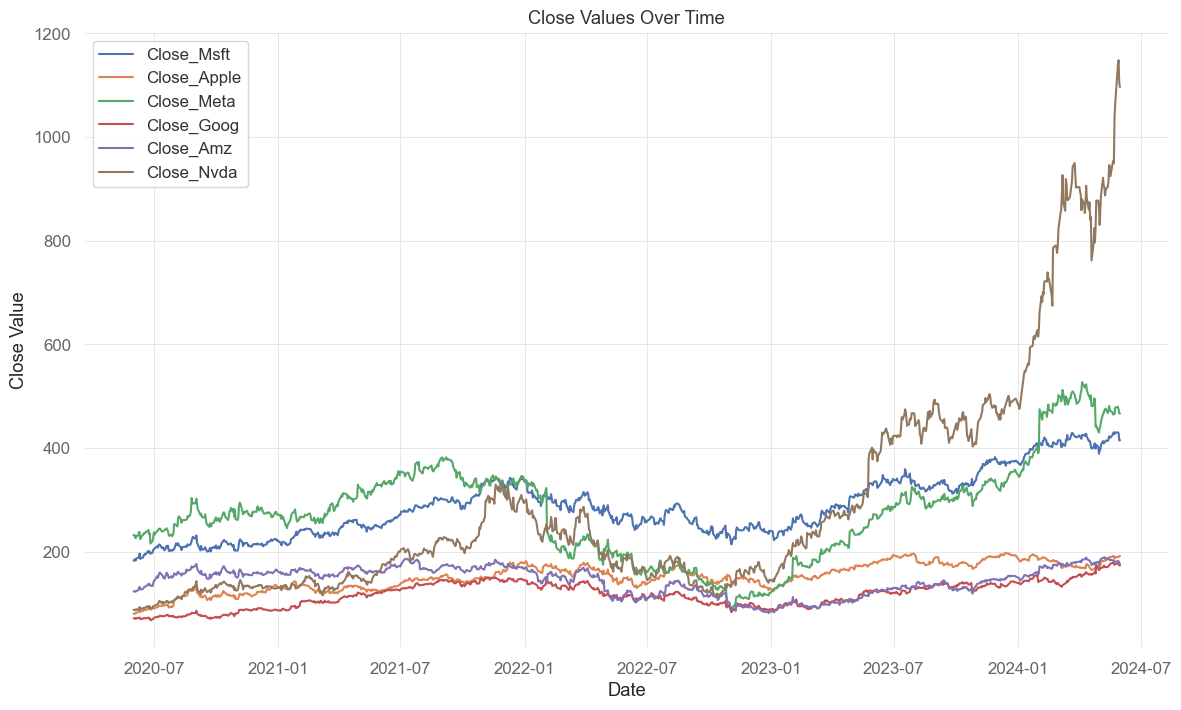

In [2806]:
plt.figure(figsize=(14,8))

# Graficar cada columna que empieza con 'Close'
for column in df_opt.columns:
    if column.startswith('Close'):
        plt.plot(df['Date'], df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Close Values Over Time')
plt.legend()
plt.show()

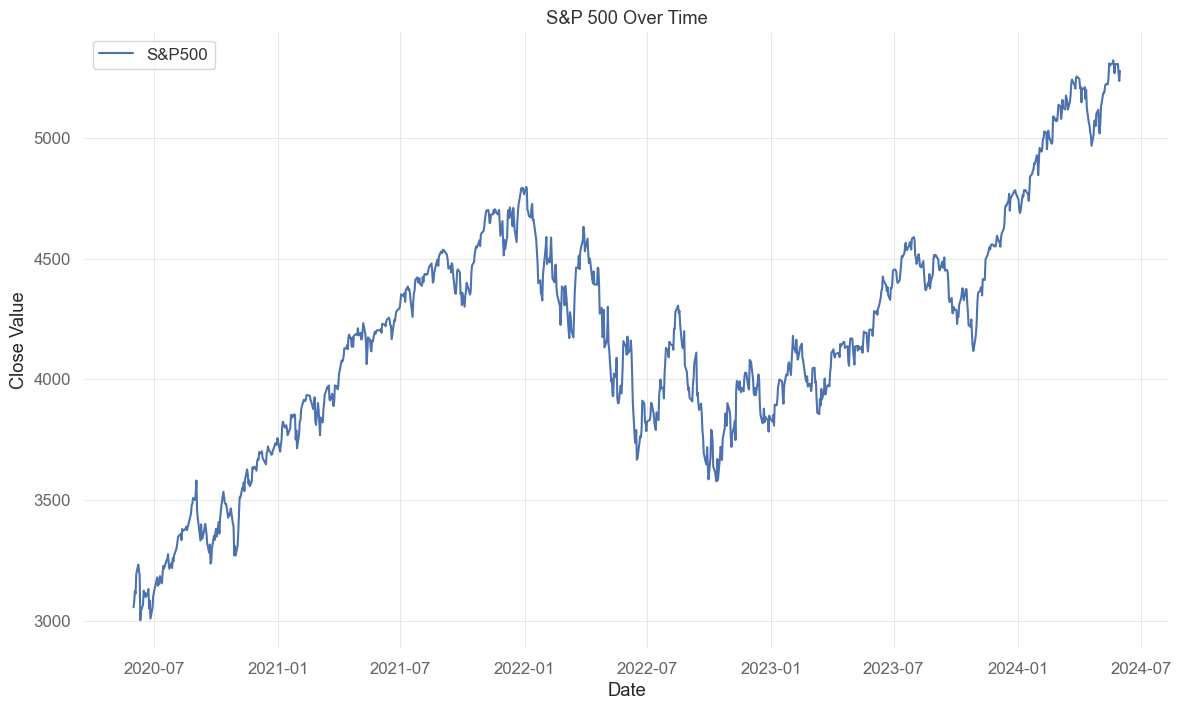

In [2807]:
plt.figure(figsize=(14,8))

# Graficar cada columna que empieza con 'Close'

plt.plot(df['Date'], df['S&P500'], label=column)
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('S&P 500 Over Time')
plt.legend()
plt.show()

### III.Preprocesamiento de datos

#### Como nuestro objetivo es intentar predecir el SP500, vamos a intentar separarlo en su distintas componentes

In [2808]:
X=df_opt.drop(columns='S&P500')
X.set_index('Date', inplace=True)
X.head()

,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda
Date,,,,,,,,,,,,
2020-06-01,182.830002,22622400,80.462502,80791200,231.910004,18223800,71.591003,24342000,123.552002,58578000,88.062500,38987600
2020-06-02,184.910004,30794600,80.834999,87642800,232.720001,20919000,71.960999,25562000,123.620499,50598000,88.252502,39132000
2020-06-03,185.360001,27311000,81.279999,104491200,230.160004,15380300,71.819000,25124000,123.919998,53420000,87.695000,36544000
2020-06-04,182.919998,28761800,80.580002,87560400,226.289993,17041500,70.609001,29686000,123.029999,58974000,87.665001,42428000
2020-06-05,187.199997,39893600,82.875000,137250400,230.770004,16750400,71.919502,34698000,124.150002,66128000,89.199997,48174800


In [2809]:
X_train = X[:int((0.9*len(X)))]
X_test = X[int((0.9*len(X))):]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2024-01-08 to 2024-05-31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close_Msft    101 non-null    float64
 1   Volumen_Msft  101 non-null    int64  
 2   Close_Apple   101 non-null    float64
 3   Volumen_Aapl  101 non-null    int64  
 4   Close_Meta    101 non-null    float64
 5   Volumen_Meta  101 non-null    int64  
 6   Close_Goog    101 non-null    float64
 7   Volumen_Goog  101 non-null    int64  
 8   Close_Amz     101 non-null    float64
 9   Volumen_Amz   101 non-null    int64  
 10  Close_Nvda    101 non-null    float64
 11  Volumen_Nvda  101 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 10.3 KB


In [2810]:
# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scaler = StandardScaler()
scaler.fit(X_train)

# Utilizo los datos de train para escalar train y test.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2811]:
X_train_scaled

array([[-1.93728081, -0.59543653, -2.67194323, ..., -0.44441304,
        -1.23106266, -0.35238111],
       [-1.89304265,  0.18192619, -2.65735176, ..., -0.71392781,
        -1.22939615, -0.34431691],
       [-1.88347197, -0.14944367, -2.63992024, ..., -0.6186182 ,
        -1.234286  , -0.48884714],
       ...,
       [ 2.05627316, -0.55157539,  1.39361936, ..., -0.75352756,
         2.16881458, -0.73760892],
       [ 1.99969934, -0.75913339,  1.30195705, ..., -0.53013765,
         2.2064422 , -0.81780979],
       [ 1.9956583 , -0.75100039,  1.27336107, ..., -0.89877846,
         2.30283531, -0.21448542]])

In [2812]:
Y=df_opt[['Date','S&P500']]
Y.set_index('Date',inplace=True)
#Y.asfreq('d')

In [2813]:
Y_train = Y[:int((0.9*len(Y)))]
Y_test = Y[int((0.9*len(Y))):]
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2024-01-08 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S&P500  101 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


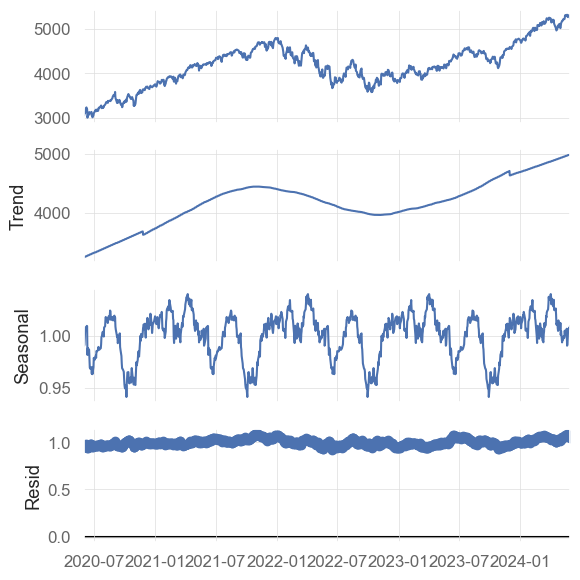

In [2814]:
result_mul = seasonal_decompose(Y, model = 'multiplicative', period=250 ,extrapolate_trend = 'freq')
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

In [2815]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis = 1)
df_reconstructed.columns = ['seasonal', 'trend', 'resid', 'actual_values']

In [2816]:
df_reconstructed['check_multiplicate'] = df_reconstructed['seasonal'] * df_reconstructed['trend'] * df_reconstructed['resid']
df_reconstructed

,seasonal,trend,resid,actual_values,check_multiplicate
Date,,,,,
2020-06-01,0.990387,3245.478733,0.950674,3055.73,3055.73
2020-06-02,0.991340,3249.009634,0.956517,3080.82,3080.82
2020-06-03,0.997252,3252.540535,0.962778,3122.87,3122.87
2020-06-04,1.005266,3256.071435,0.950854,3112.35,3112.35
2020-06-05,1.007848,3259.602336,0.972222,3193.93,3193.93
...,...,...,...,...,...
2024-05-24,1.005266,4974.490041,1.060799,5304.72,5304.72
2024-05-28,1.007848,4977.354046,1.057735,5306.04,5306.04
2024-05-29,1.007195,4980.218051,1.050019,5266.95,5266.95


#### Root Test Stationary
Utilizamos los root test para comprobar si la serie es stationary. La hipótesis nula de los test supone que la serie NO es estacionaria. Si el resultado del test queda por debajo del nivel de significación (0.05), rechazaremos la hipótesis nula en favor de la alternativa. La serie será estacionaria. En caso contrario la serie NO es estacionaria y por tanto habrá que aplicar técnicas de diferenciación.

In [2817]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(Y['S&P500'].values)
result[1]

## Sospechamos que la serie no es estacionaria

0.5522880204811266

#### Comprobación del seasonality en un Time Series
Lo mejor es mediante un plot, pero también puede resultar útil graficar la autocorrelación.

No se ven picos claros, con más datos se podría buscar un seasonality

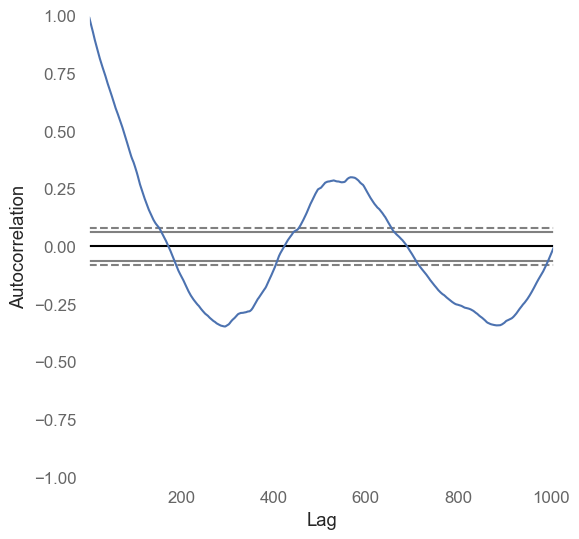

In [2818]:

autocorrelation_plot(Y['S&P500'].values);

Se aprecia en la gráfica que presenta diferentes estadísticos a lo largo del tiempo.

Representamos su gráfica de autocorrelación. Vemos que tenemos muy complicado determinar el orden p y q, de cara al modelo ARIMA.

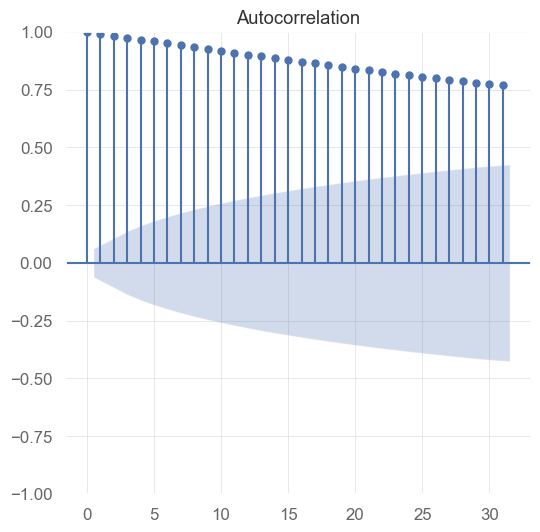

In [2819]:
plot_acf(Y['S&P500']);

# IV.Modelado

## 4.1 Modelado univariante

### 4.1.1 PROPHET

Adaptaremos nuestros train y test para el target Y

In [2820]:
train_prophet=Y_train

In [2821]:
Y_train=Y_train.reset_index()
X_uni_train, Y_uni_train = pd.DataFrame(Y_train.iloc[::, 0]), pd.DataFrame(Y_train.iloc[::, 1])
X_uni_train.rename(columns = {'Date':'ds'}, inplace = True)
Y_uni_train.rename(columns = {'S&P500':'y'}, inplace = True)
X_uni_train


,ds
0,2020-06-01
1,2020-06-02
2,2020-06-03
3,2020-06-04
4,2020-06-05
...,...
902,2023-12-29
903,2024-01-02
904,2024-01-03
905,2024-01-04


In [2822]:
Y_test=Y_test.reset_index()
X_uni_test, Y_uni_test = pd.DataFrame(Y_test.iloc[::, 0]), pd.DataFrame(Y_test.iloc[::, 1])
X_uni_test.rename(columns = {'Date':'ds'}, inplace = True)
Y_uni_test.rename(columns = {'S&P500':'y'}, inplace = True)
X_uni_test

,ds
0,2024-01-08
1,2024-01-09
2,2024-01-10
3,2024-01-11
4,2024-01-12
...,...
96,2024-05-24
97,2024-05-28
98,2024-05-29
99,2024-05-30


In [2823]:
Y_train.rename(columns = {'Date':'ds'}, inplace = True)
Y_train.rename(columns = {'S&P500':'y'}, inplace = True)


In [2824]:
# Train the model
model = Prophet()
model.fit(Y_train)

00:25:41 - cmdstanpy - INFO - Chain [1] start processing
00:25:42 - cmdstanpy - INFO - Chain [1] done processing


In [2825]:
Y_pred_train = model.predict(X_uni_train)

In [2826]:
Y_pred = model.predict(X_uni_test)

In [2827]:
Y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-08,4681.858308,4574.898118,4793.119088,4681.858308,4681.858308,6.726036,6.726036,6.726036,-6.709085,-6.709085,-6.709085,13.435121,13.435121,13.435121,0.0,0.0,0.0,4688.584344
1,2024-01-09,4683.955404,4580.377245,4790.090705,4683.955404,4683.955404,-0.563237,-0.563237,-0.563237,-8.522954,-8.522954,-8.522954,7.959717,7.959717,7.959717,0.0,0.0,0.0,4683.392168
2,2024-01-10,4686.052500,4575.539905,4791.729727,4686.052500,4686.052500,-5.894727,-5.894727,-5.894727,-8.118925,-8.118925,-8.118925,2.224198,2.224198,2.224198,0.0,0.0,0.0,4680.157773
3,2024-01-11,4688.149596,4569.359950,4788.482937,4688.149596,4688.149596,-13.201843,-13.201843,-13.201843,-9.565151,-9.565151,-9.565151,-3.636691,-3.636691,-3.636691,0.0,0.0,0.0,4674.947753
4,2024-01-12,4690.246692,4570.652801,4781.339825,4690.246692,4690.246692,-16.408935,-16.408935,-16.408935,-6.926126,-6.926126,-6.926126,-9.482809,-9.482809,-9.482809,0.0,0.0,0.0,4673.837757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2024-05-24,4969.160449,4784.228750,5138.265597,4822.494045,5106.136371,-2.368554,-2.368554,-2.368554,-6.926126,-6.926126,-6.926126,4.557572,4.557572,4.557572,0.0,0.0,0.0,4966.791895
97,2024-05-28,4977.548833,4811.189951,5175.110050,4827.157269,5118.258123,20.738590,20.738590,20.738590,-8.522954,-8.522954,-8.522954,29.261544,29.261544,29.261544,0.0,0.0,0.0,4998.287423
98,2024-05-29,4979.645929,4802.724890,5189.763642,4826.052679,5124.594890,26.489202,26.489202,26.489202,-8.118925,-8.118925,-8.118925,34.608127,34.608127,34.608127,0.0,0.0,0.0,5006.135131
99,2024-05-30,4981.743025,4812.255110,5188.103986,4825.519148,5128.514321,29.881755,29.881755,29.881755,-9.565151,-9.565151,-9.565151,39.446906,39.446906,39.446906,0.0,0.0,0.0,5011.624780


In [2828]:
score_mae = mean_absolute_error(Y_uni_train, Y_pred_train['yhat'])
score_rmse = root_mean_squared_error(Y_uni_train, Y_pred_train['yhat'])

print('MAE train: {}'.format(score_mae))
print('RMSE train: {}'.format(score_rmse))

score_mae = mean_absolute_error(Y_uni_test, Y_pred['yhat'])
score_rmse = root_mean_squared_error(Y_uni_test, Y_pred['yhat'])

print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))

MAE train: 66.68923505570464
RMSE train: 84.56109950837521
MAE: 257.62900102019876
RMSE: 284.222384230196


Vamos a graficar el resultado para aclarar los datos

c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



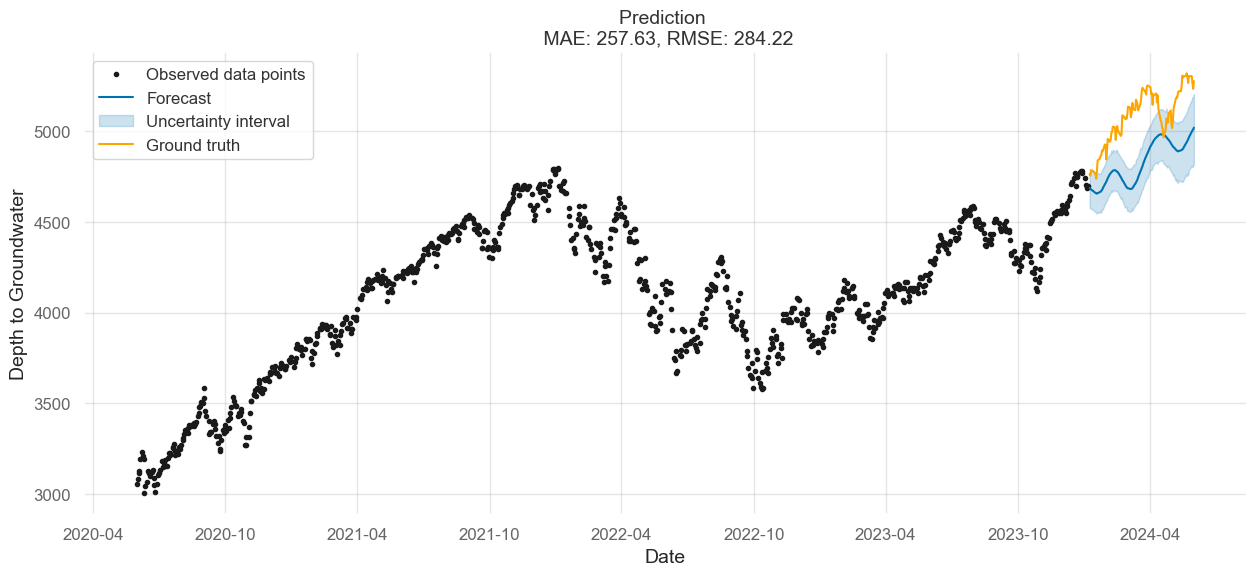

In [2829]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(Y_pred, ax=ax)
sns.lineplot(x=X_uni_test['ds'], y=Y_uni_test['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

No parece un mal modelo porque copia la tendencia, pero vamos a ver si lo podemos mejorar la transformación box-cox

### 4.1.2 BOX_COX

Vamos a probar sin con la transformación box cox mejorar nuestro modelo

In [2830]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [2831]:
train_df2 = Y_train.copy().set_index('ds')

In [2832]:
train_df2['y'], lambda_prophet = stats.boxcox(train_df2['y'])
train_df2.reset_index(inplace=True)

In [2833]:
m2 = Prophet()
m2.fit(train_df2)
forecast2 = m2.predict(X_uni_test)

00:25:43 - cmdstanpy - INFO - Chain [1] start processing
00:25:43 - cmdstanpy - INFO - Chain [1] done processing


In [2834]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-08,4.976368e+11,4.759003e+11,5.451186e+11,4.976368e+11,4.976368e+11,1.359064e+10,1.359064e+10,1.359064e+10,-1.766336e+09,-1.766336e+09,-1.766336e+09,1.535698e+10,1.535698e+10,1.535698e+10,0.0,0.0,0.0,5.112274e+11
1,2024-01-09,4.981939e+11,4.752419e+11,5.411783e+11,4.981939e+11,4.981939e+11,1.074623e+10,1.074623e+10,1.074623e+10,-2.310878e+09,-2.310878e+09,-2.310878e+09,1.305710e+10,1.305710e+10,1.305710e+10,0.0,0.0,0.0,5.089401e+11
2,2024-01-10,4.987510e+11,4.735704e+11,5.399598e+11,4.987510e+11,4.987510e+11,8.498929e+09,8.498929e+09,8.498929e+09,-2.172017e+09,-2.172017e+09,-2.172017e+09,1.067095e+10,1.067095e+10,1.067095e+10,0.0,0.0,0.0,5.072499e+11
3,2024-01-11,4.993081e+11,4.731451e+11,5.381408e+11,4.993081e+11,4.993081e+11,5.760955e+09,5.760955e+09,5.760955e+09,-2.483326e+09,-2.483326e+09,-2.483326e+09,8.244281e+09,8.244281e+09,8.244281e+09,0.0,0.0,0.0,5.050691e+11
4,2024-01-12,4.998652e+11,4.706111e+11,5.376138e+11,4.998652e+11,4.998652e+11,4.200282e+09,4.200282e+09,4.200282e+09,-1.623972e+09,-1.623972e+09,-1.623972e+09,5.824254e+09,5.824254e+09,5.824254e+09,0.0,0.0,0.0,5.040655e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2024-05-24,5.739613e+11,5.168415e+11,6.074617e+11,5.440163e+11,6.054093e+11,-1.276605e+10,-1.276605e+10,-1.276605e+10,-1.623972e+09,-1.623972e+09,-1.623972e+09,-1.114208e+10,-1.114208e+10,-1.114208e+10,0.0,0.0,0.0,5.611952e+11
97,2024-05-28,5.761897e+11,5.238957e+11,6.149688e+11,5.457469e+11,6.080102e+11,-6.944826e+09,-6.944826e+09,-6.944826e+09,-2.310878e+09,-2.310878e+09,-2.310878e+09,-4.633948e+09,-4.633948e+09,-4.633948e+09,0.0,0.0,0.0,5.692449e+11
98,2024-05-29,5.767468e+11,5.247701e+11,6.155954e+11,5.455422e+11,6.087330e+11,-5.345780e+09,-5.345780e+09,-5.345780e+09,-2.172017e+09,-2.172017e+09,-2.172017e+09,-3.173763e+09,-3.173763e+09,-3.173763e+09,0.0,0.0,0.0,5.714011e+11
99,2024-05-30,5.773039e+11,5.291003e+11,6.184172e+11,5.453728e+11,6.092013e+11,-4.308748e+09,-4.308748e+09,-4.308748e+09,-2.483326e+09,-2.483326e+09,-2.483326e+09,-1.825422e+09,-1.825422e+09,-1.825422e+09,0.0,0.0,0.0,5.729952e+11


In [2835]:
for column in ["trend", "yhat_lower", "yhat_upper", "trend_lower", "trend_upper", "multiplicative_terms", 
               "multiplicative_terms_lower", "multiplicative_terms_upper", "yhat"]:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

In [2836]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-08,4624.388129,4562.856300,4752.530157,4624.388129,4624.388129,1.359064e+10,1.359064e+10,1.359064e+10,-1.766336e+09,-1.766336e+09,-1.766336e+09,1.535698e+10,1.535698e+10,1.535698e+10,1.0,1.0,1.0,4661.910171
1,2024-01-09,4625.940257,4560.961909,4742.200540,4625.940257,4625.940257,1.074623e+10,1.074623e+10,1.074623e+10,-2.310878e+09,-2.310878e+09,-2.310878e+09,1.305710e+10,1.305710e+10,1.305710e+10,1.0,1.0,1.0,4655.644509
2,2024-01-10,4627.491172,4556.144626,4738.995529,4627.491172,4627.491172,8.498929e+09,8.498929e+09,8.498929e+09,-2.172017e+09,-2.172017e+09,-2.172017e+09,1.067095e+10,1.067095e+10,1.067095e+10,1.0,1.0,1.0,4651.001866
3,2024-01-11,4629.040873,4554.917219,4734.201807,4629.040873,4629.040873,5.760955e+09,5.760955e+09,5.760955e+09,-2.483326e+09,-2.483326e+09,-2.483326e+09,8.244281e+09,8.244281e+09,8.244281e+09,1.0,1.0,1.0,4644.995386
4,2024-01-12,4630.589365,4547.586889,4732.810875,4630.589365,4630.589365,4.200282e+09,4.200282e+09,4.200282e+09,-1.623972e+09,-1.623972e+09,-1.623972e+09,5.824254e+09,5.824254e+09,5.824254e+09,1.0,1.0,1.0,4642.225302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2024-05-24,4826.592871,4677.206252,4909.414688,4749.645652,4904.433962,-1.276605e+10,-1.276605e+10,-1.276605e+10,-1.623972e+09,-1.623972e+09,-1.623972e+09,-1.114208e+10,-1.114208e+10,-1.114208e+10,1.0,1.0,1.0,4794.141084
97,2024-05-28,4832.205738,4696.262014,4927.533325,4754.172274,4910.743782,-6.944826e+09,-6.944826e+09,-6.944826e+09,-2.310878e+09,-2.310878e+09,-2.310878e+09,-4.633948e+09,-4.633948e+09,-4.633948e+09,1.0,1.0,1.0,4814.663095
98,2024-05-29,4833.606580,4698.611512,4929.038629,4753.637298,4912.493871,-5.345780e+09,-5.345780e+09,-5.345780e+09,-2.172017e+09,-2.172017e+09,-2.172017e+09,-3.173763e+09,-3.173763e+09,-3.173763e+09,1.0,1.0,1.0,4820.125517
99,2024-05-30,4835.006475,4710.206435,4935.804333,4753.194537,4913.627236,-4.308748e+09,-4.308748e+09,-4.308748e+09,-2.483326e+09,-2.483326e+09,-2.483326e+09,-1.825422e+09,-1.825422e+09,-1.825422e+09,1.0,1.0,1.0,4824.154860


In [2837]:

score_mae = mean_absolute_error(Y_uni_test, forecast2['yhat'])
score_rmse = root_mean_squared_error(Y_uni_test, forecast2['yhat'])

print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))

MAE: 365.2068869351156
RMSE: 386.6643111845324


Las métricas son peores usando el método box-cox

c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



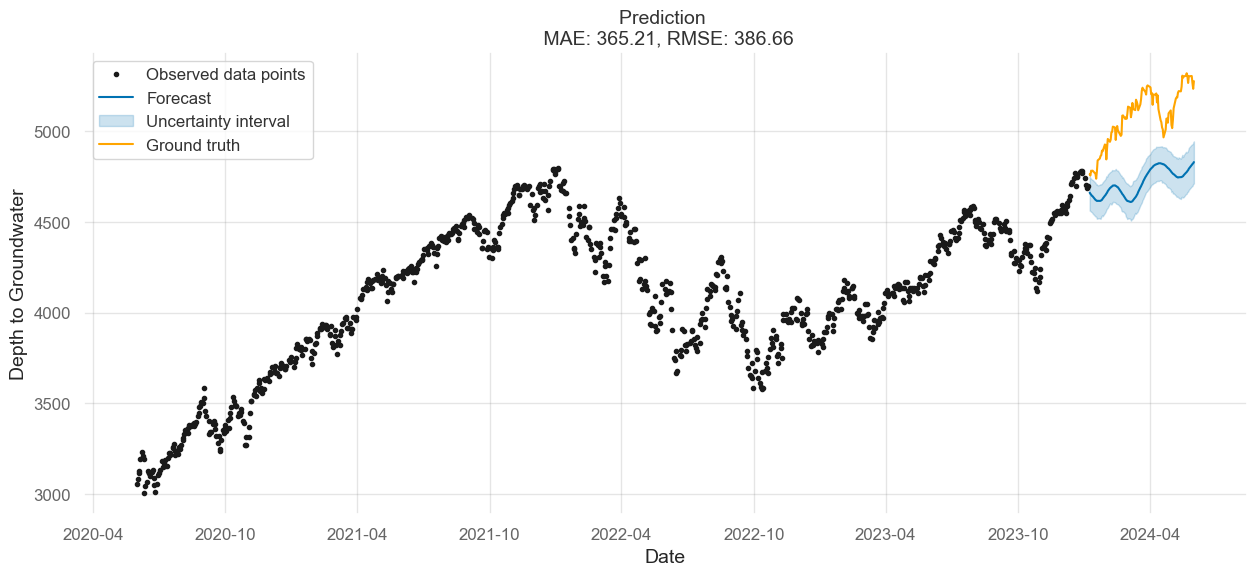

In [2838]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(forecast2, ax=ax)
sns.lineplot(x=X_uni_test['ds'], y=Y_uni_test['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

Con la transforamción el modelo se comporta peor

### 4.1.3 Auto-Arima

Usaremos este método para encontrar los parámetros óptimos de arima

In [2839]:
train_auto_arima=train_prophet

In [2840]:
model_auto_arima = auto_arima(Y_uni_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5,max_d=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9460.549, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9456.644, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9458.548, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9458.547, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9456.138, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.256 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  907
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4727.069
Date:                Wed, 05 Jun 2024   AIC                           9456.138
Time:                        00:25:43   BIC                           9460.947
Sample:                             0   HQIC                          9457.974
                                - 907                                       

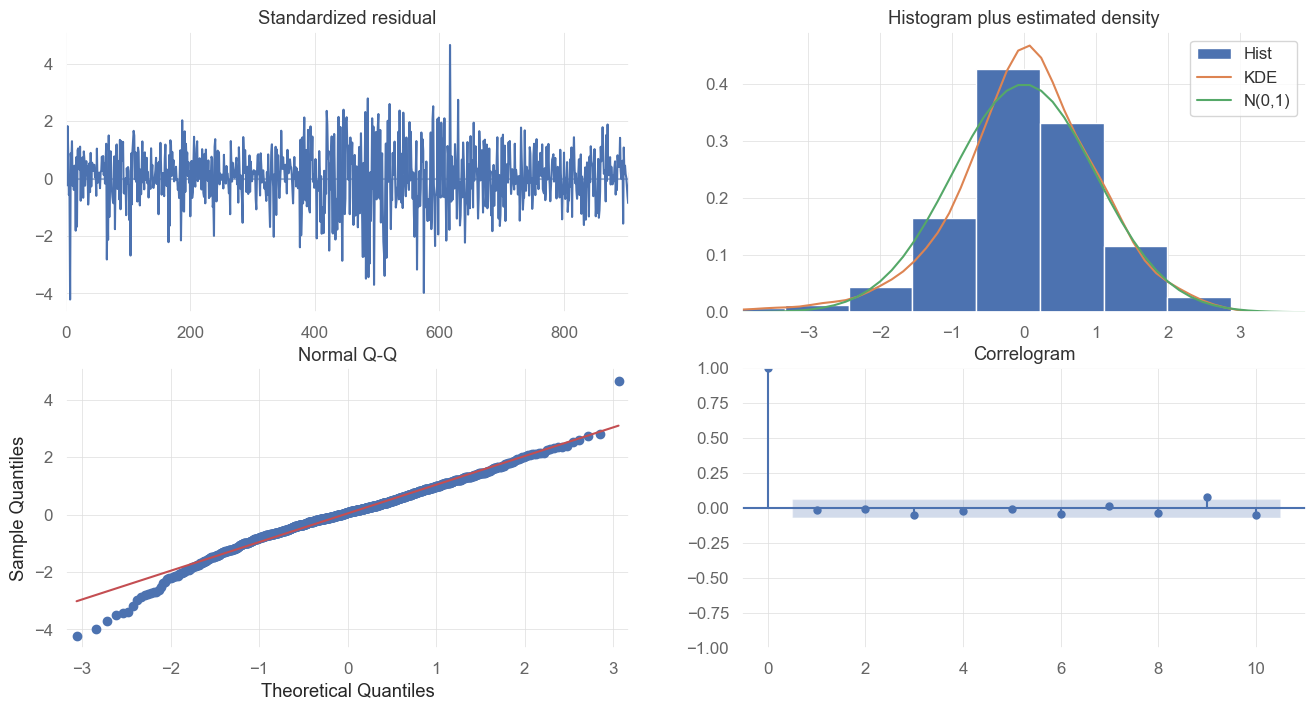

In [2841]:
model_auto_arima.plot_diagnostics(figsize=(16,8))
plt.show()

Conclusiones antes de usar el ARIMA óptimo:

* Arriba a la izquierda vemos que los errores residuales varían entre -4 y 4
* Arriba a la derecha se observa casi una distribución normla
* Abajo a la izquierda se ve que la distribución no esta muy sesgada
* Abajo a la derecha muestra que los errores residuales no están correlacionados

### 4.1.4 ARIMA ÓPTIMO

In [2842]:
model_arima = ARIMA(order=(0,1,0))
model_arima.fit(Y_uni_train)


ARIMA(order=(0, 1, 0))

In [2843]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  907
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4726.322
Date:                Wed, 05 Jun 2024   AIC                           9456.644
Time:                        00:25:44   BIC                           9466.262
Sample:                             0   HQIC                          9460.317
                                - 907                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8118      1.511      1.199      0.231      -1.150       4.774
sigma2      1989.2335     71.326     27.889      0.000    1849.437    2129.030
Ljung-Box (L1) (Q):                   0.10   Jarque-

In [2844]:
predictions = model_arima.predict(101)


In [2845]:
predictions=pd.DataFrame(predictions.items(),columns=['Index','Value'])

In [2846]:
predictions

,Index,Value
0,907,4699.051821
1,908,4700.863642
2,909,4702.675464
3,910,4704.487285
4,911,4706.299106
...,...,...
96,1003,4872.986656
97,1004,4874.798477
98,1005,4876.610298
99,1006,4878.422119


In [2847]:
print("mean_squared_error:", mean_squared_error(Y_uni_test, predictions['Value']))

mean_squared_error: 98804.26612322101


In [2848]:
X_uni_test

,ds
0,2024-01-08
1,2024-01-09
2,2024-01-10
3,2024-01-11
4,2024-01-12
...,...
96,2024-05-24
97,2024-05-28
98,2024-05-29
99,2024-05-30


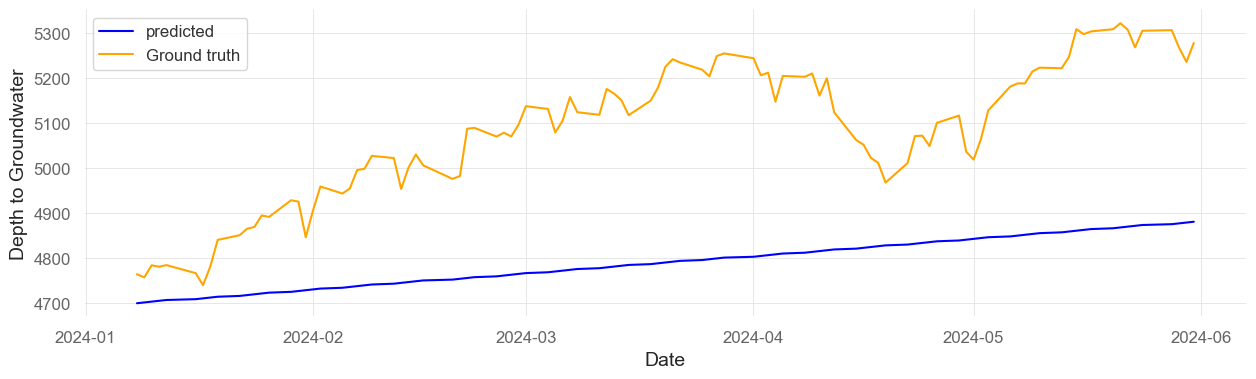

In [2849]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=X_uni_test['ds'], y=predictions['Value'], ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=X_uni_test['ds'], y=Y_uni_test['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### 4.1.5 LSTM

In [2850]:
Y_red=Y.reset_index()
Y_red.rename(columns = {'Date':'ds'}, inplace = True)
Y_red.rename(columns = {'S&P500':'y'}, inplace = True)

In [2851]:
Y_red

,ds,y
0,2020-06-01,3055.73
1,2020-06-02,3080.82
2,2020-06-03,3122.87
3,2020-06-04,3112.35
4,2020-06-05,3193.93
...,...,...
1003,2024-05-24,5304.72
1004,2024-05-28,5306.04
1005,2024-05-29,5266.95
1006,2024-05-30,5235.48


In [2852]:
dataset=Y_red[['y']].values

In [2853]:
dataset

array([[3055.73],
       [3080.82],
       [3122.87],
       ...,
       [5266.95],
       [5235.48],
       [5277.51]])

In [2854]:
scaler=MinMaxScaler(feature_range=(-1,0))
scaled_data=scaler.fit_transform(dataset)

In [2855]:
scaled_data

array([[-0.97687674],
       [-0.96605887],
       [-0.94792848],
       ...,
       [-0.02348112],
       [-0.03704981],
       [-0.01892804]])

In [2856]:
# Defines the rolling window
look_back = 30
# Split into train and test sets
train, test = scaled_data[:int(0.90*len(Y))-look_back,:], scaled_data[int(0.90*len(Y))-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

847 101


In [2857]:
x_train.shape[1]

1

In [2858]:
x_train.shape[2]

30

In [2859]:
x_train

array([[[-0.97687674, -0.96605887, -0.94792848, ..., -0.93534715,
         -0.92112309, -0.93398036]],

       [[-0.96605887, -0.94792848, -0.95246431, ..., -0.92112309,
         -0.93398036, -0.91574218]],

       [[-0.94792848, -0.95246431, -0.91729006, ..., -0.93398036,
         -0.91574218, -0.90322122]],

       ...,

       [[-0.43672903, -0.42501865, -0.41528299, ..., -0.35601537,
         -0.35291962, -0.35060859]],

       [[-0.42501865, -0.41528299, -0.40721594, ..., -0.35291962,
         -0.35060859, -0.34811647]],

       [[-0.41528299, -0.40721594, -0.41900393, ..., -0.35060859,
         -0.34811647, -0.33373288]]])

In [2860]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(8))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history=model.fit(x_train, y_train, batch_size=8, epochs=200, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])


model.summary()

Epoch 1/200


c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0583 - val_loss: 0.0114
Epoch 2/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0074
Epoch 3/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 4/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 5/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 6/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 7/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 8/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 9/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0031
Epoch 10/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0115e-04 - val_loss: 0.0032
Epoch 11/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2265e-04 - val_loss: 0.0024
Epoch 12/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                  │ (None, 1, 128)         │        81,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,509 (1.52 MB)

 Trainable params: 133,169 (520.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,340 (1.02 MB)

In [2861]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE: 81.57582975320263


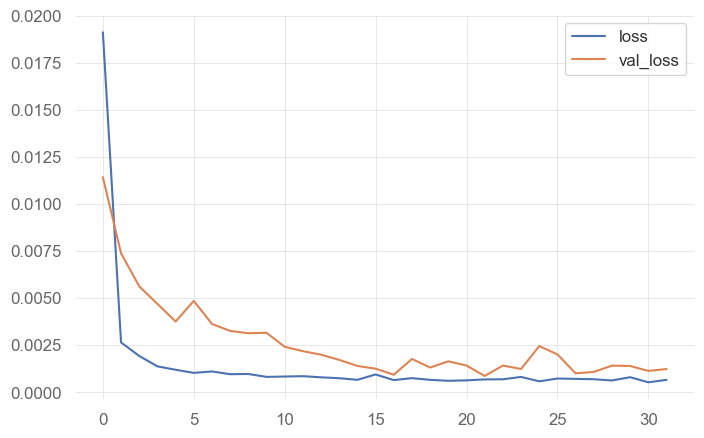

In [2862]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

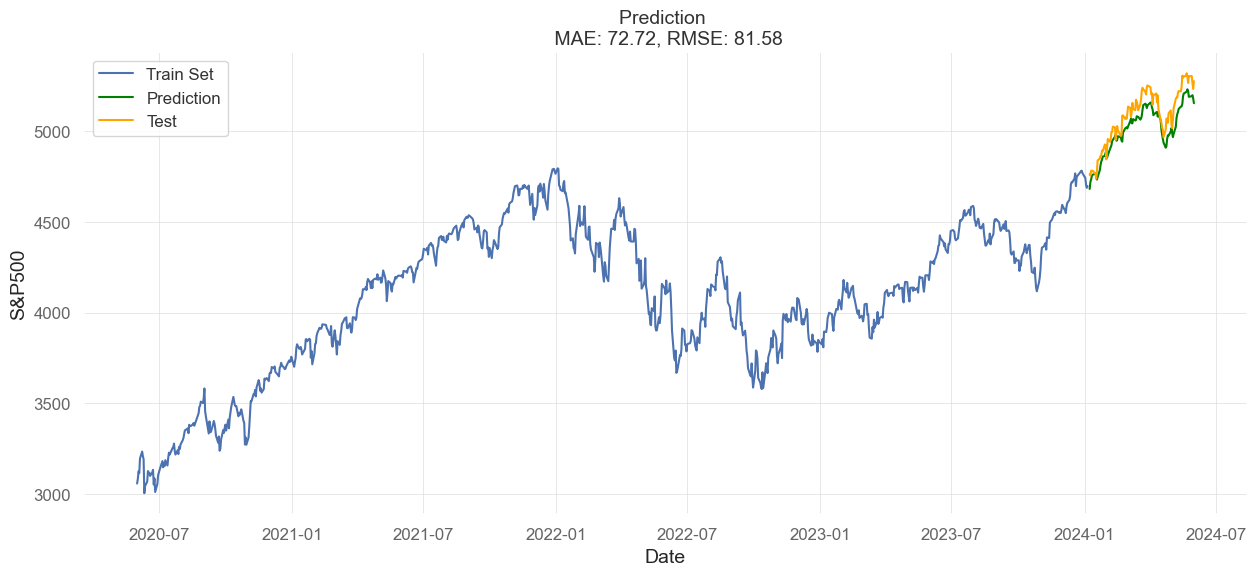

In [2863]:
x_train_ticks = Y_red.head(int(0.90*len(Y_red)))['ds']
y_train = Y_red.head(int(0.90*len(Y_red)))['y']
x_test_ticks = Y_red.tail(int(0.10*len(Y_red)+1))['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Test') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='S&P500', fontsize=14)

plt.show()

## 4.2 Modelos Multivariantes

### 4.2.1 Prophet Multivariante

In [2864]:
df_opt

,Date,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda,S&P500
0,2020-06-01,182.830002,22622400,80.462502,80791200,231.910004,18223800,71.591003,24342000,123.552002,58578000,88.062500,38987600,3055.73
1,2020-06-02,184.910004,30794600,80.834999,87642800,232.720001,20919000,71.960999,25562000,123.620499,50598000,88.252502,39132000,3080.82
2,2020-06-03,185.360001,27311000,81.279999,104491200,230.160004,15380300,71.819000,25124000,123.919998,53420000,87.695000,36544000,3122.87
3,2020-06-04,182.919998,28761800,80.580002,87560400,226.289993,17041500,70.609001,29686000,123.029999,58974000,87.665001,42428000,3112.35
4,2020-06-05,187.199997,39893600,82.875000,137250400,230.770004,16750400,71.919502,34698000,124.150002,66128000,89.199997,48174800,3193.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2024-05-24,430.160004,11845800,189.979996,36294600,478.220001,12012300,176.330002,11400600,180.750000,27434100,1064.689941,42650200,5304.72
1004,2024-05-28,430.320007,15718000,189.990005,52280100,479.920013,10175800,178.020004,15655300,182.149994,29927000,1139.010010,65272800,5306.04
1005,2024-05-29,429.170013,15517100,190.289993,53068000,474.359985,9226200,177.399994,15023800,182.020004,32009300,1148.250000,55744200,5266.95
1006,2024-05-30,414.670013,28424800,191.289993,49947900,467.049988,10735200,173.559998,18844000,179.320007,29249200,1105.000000,48735000,5235.48


In [2865]:
features_columns=["Close_Msft", "Volumen_Msft","Close_Apple", "Volumen_Aapl","Close_Meta", 
                  "Volumen_Meta","Close_Goog", "Volumen_Goog","Close_Amz", "Volumen_Amz","Close_Nvda", "Volumen_Nvda"]

In [2866]:
target_column=['S&P500']

In [2867]:
train_size=int(0.90*len(df_opt))

In [2868]:
multivariate_df = df_opt[['Date'] + target_column + features_columns].copy()
multivariate_df.columns = ['ds', 'y'] + features_columns

In [2869]:
train = multivariate_df.iloc[:train_size, :]
train.set_index('ds')

,y,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda
ds,,,,,,,,,,,,,
2020-06-01,3055.73,182.830002,22622400,80.462502,80791200,231.910004,18223800,71.591003,24342000,123.552002,58578000,88.062500,38987600
2020-06-02,3080.82,184.910004,30794600,80.834999,87642800,232.720001,20919000,71.960999,25562000,123.620499,50598000,88.252502,39132000
2020-06-03,3122.87,185.360001,27311000,81.279999,104491200,230.160004,15380300,71.819000,25124000,123.919998,53420000,87.695000,36544000
2020-06-04,3112.35,182.919998,28761800,80.580002,87560400,226.289993,17041500,70.609001,29686000,123.029999,58974000,87.665001,42428000
2020-06-05,3193.93,187.199997,39893600,82.875000,137250400,230.770004,16750400,71.919502,34698000,124.150002,66128000,89.199997,48174800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,4769.83,376.040009,18723000,192.529999,42628800,353.959991,14980500,140.929993,14872700,151.940002,39789000,495.220001,38869000
2024-01-02,4742.83,370.869995,25258600,185.639999,82488700,346.290009,19042200,139.559998,20071900,149.929993,47339400,481.679993,41125400
2024-01-03,4704.81,370.600006,23083500,184.250000,58414500,344.470001,15451100,140.360001,18974300,148.470001,49425500,475.690002,32089600


In [2870]:
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_test, y_test = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

y_train.head()

,y
0,3055.73
1,3080.82
2,3122.87
3,3112.35
4,3193.93


In [2871]:
x_train_date=x_train.iloc[::,0]
x_test_date=x_test.iloc[::,0]
x_train=x_train.drop(columns='ds')
x_test=x_test.drop(columns='ds')

In [2872]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [2873]:
x_test_scaled=pd.DataFrame(x_test_scaled, columns=[['Close_Msft', 'Volumen_Msft', 'Close_Apple', 'Volumen_Aapl', 'Close_Meta', 'Volumen_Meta', 'Close_Goog', 'Volumen_Goog', 'Close_Amz', 'Volumen_Amz', 'Close_Nvda', 'Volumen_Nvda']])

x_test_scaled

,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda
0,0.919848,-0.656936,0.786651,-0.799615,0.839602,-0.925742,0.753875,-0.764275,0.284576,-0.805191,1.088564,-0.246728
1,0.930855,-0.713666,0.779511,-0.892697,0.831214,-0.929500,0.802960,-0.721696,0.327917,-0.828721,1.131164,-0.066109
2,1.000700,-0.598331,0.797361,-0.870138,0.920142,-0.853209,0.832943,-0.786361,0.372977,-0.823853,1.189278,-0.397090
3,1.019312,-0.540799,0.787161,-0.856803,0.914686,-0.896514,0.829799,-0.768109,0.400661,-0.786688,1.211947,-0.310006
4,1.057737,-0.693581,0.792771,-0.906383,0.947557,-0.878085,0.843582,-0.844618,0.389969,-0.855509,1.206568,-0.647870
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.474909,-0.934875,0.861790,-0.930079,1.654960,-0.942298,1.619508,-0.901729,0.888869,-0.959600,3.692441,-0.545488
97,1.476510,-0.839533,0.861961,-0.838808,1.666553,-0.958490,1.660372,-0.808077,0.915599,-0.939680,4.049385,-0.232595
98,1.465002,-0.844480,0.867060,-0.834310,1.628636,-0.966862,1.645380,-0.821977,0.913118,-0.923040,4.093762,-0.364385
99,1.319908,-0.526666,0.884060,-0.852124,1.578784,-0.953558,1.552530,-0.737890,0.861567,-0.945096,3.886042,-0.461330


In [2874]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=[['Close_Msft', 'Volumen_Msft', 'Close_Apple', 'Volumen_Aapl', 'Close_Meta', 'Volumen_Meta', 'Close_Goog', 'Volumen_Goog', 'Close_Amz', 'Volumen_Amz', 'Close_Nvda', 'Volumen_Nvda']])
x_train_scaled

,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda
0,-1.000000,-0.669533,-1.000000,-0.676022,-0.024789,-0.887535,-0.913050,-0.616872,-0.203211,-0.710731,-0.998091,-0.596146
1,-0.979186,-0.468317,-0.993668,-0.636902,-0.019266,-0.863773,-0.904103,-0.590018,-0.201904,-0.774499,-0.997178,-0.594149
2,-0.974684,-0.554090,-0.986103,-0.540705,-0.036724,-0.912604,-0.907537,-0.599659,-0.196185,-0.751949,-0.999856,-0.629943
3,-0.999099,-0.518369,-0.998003,-0.637373,-0.063116,-0.897959,-0.936794,-0.499244,-0.213178,-0.707567,-1.000000,-0.548562
4,-0.956272,-0.244281,-0.958988,-0.353664,-0.032564,-0.900525,-0.905107,-0.388923,-0.191794,-0.650400,-0.992628,-0.469078
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.933357,-0.765544,0.905140,-0.893913,0.807549,-0.916129,0.763547,-0.825303,0.338800,-0.860873,0.957399,-0.597786
903,0.881623,-0.604625,0.788011,-0.666330,0.755243,-0.880320,0.730420,-0.710862,0.300423,-0.800538,0.892370,-0.566578
904,0.878921,-0.658180,0.764381,-0.803783,0.742831,-0.911980,0.749764,-0.735022,0.272548,-0.783868,0.863601,-0.691552
905,0.852304,-0.711905,0.724601,-0.726310,0.760903,-0.941526,0.693667,-0.750892,0.198085,-0.731014,0.884205,-0.711415


In [2875]:
x_train_scaled=pd.concat([x_train_date,x_train_scaled],axis=1)

x_train_scaled.set_index('ds')

,"(Close_Msft,)","(Volumen_Msft,)","(Close_Apple,)","(Volumen_Aapl,)","(Close_Meta,)","(Volumen_Meta,)","(Close_Goog,)","(Volumen_Goog,)","(Close_Amz,)","(Volumen_Amz,)","(Close_Nvda,)","(Volumen_Nvda,)"
ds,,,,,,,,,,,,
2020-06-01,-1.000000,-0.669533,-1.000000,-0.676022,-0.024789,-0.887535,-0.913050,-0.616872,-0.203211,-0.710731,-0.998091,-0.596146
2020-06-02,-0.979186,-0.468317,-0.993668,-0.636902,-0.019266,-0.863773,-0.904103,-0.590018,-0.201904,-0.774499,-0.997178,-0.594149
2020-06-03,-0.974684,-0.554090,-0.986103,-0.540705,-0.036724,-0.912604,-0.907537,-0.599659,-0.196185,-0.751949,-0.999856,-0.629943
2020-06-04,-0.999099,-0.518369,-0.998003,-0.637373,-0.063116,-0.897959,-0.936794,-0.499244,-0.213178,-0.707567,-1.000000,-0.548562
2020-06-05,-0.956272,-0.244281,-0.958988,-0.353664,-0.032564,-0.900525,-0.905107,-0.388923,-0.191794,-0.650400,-0.992628,-0.469078
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,0.933357,-0.765544,0.905140,-0.893913,0.807549,-0.916129,0.763547,-0.825303,0.338800,-0.860873,0.957399,-0.597786
2024-01-02,0.881623,-0.604625,0.788011,-0.666330,0.755243,-0.880320,0.730420,-0.710862,0.300423,-0.800538,0.892370,-0.566578
2024-01-03,0.878921,-0.658180,0.764381,-0.803783,0.742831,-0.911980,0.749764,-0.735022,0.272548,-0.783868,0.863601,-0.691552


In [2876]:
x_train_scaled.columns=['ds','Close_Msft', 'Volumen_Msft', 'Close_Apple', 'Volumen_Aapl', 'Close_Meta', 'Volumen_Meta', 'Close_Goog', 'Volumen_Goog', 'Close_Amz', 'Volumen_Amz', 'Close_Nvda', 'Volumen_Nvda']
x_train_scaled

,ds,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda
0,2020-06-01,-1.000000,-0.669533,-1.000000,-0.676022,-0.024789,-0.887535,-0.913050,-0.616872,-0.203211,-0.710731,-0.998091,-0.596146
1,2020-06-02,-0.979186,-0.468317,-0.993668,-0.636902,-0.019266,-0.863773,-0.904103,-0.590018,-0.201904,-0.774499,-0.997178,-0.594149
2,2020-06-03,-0.974684,-0.554090,-0.986103,-0.540705,-0.036724,-0.912604,-0.907537,-0.599659,-0.196185,-0.751949,-0.999856,-0.629943
3,2020-06-04,-0.999099,-0.518369,-0.998003,-0.637373,-0.063116,-0.897959,-0.936794,-0.499244,-0.213178,-0.707567,-1.000000,-0.548562
4,2020-06-05,-0.956272,-0.244281,-0.958988,-0.353664,-0.032564,-0.900525,-0.905107,-0.388923,-0.191794,-0.650400,-0.992628,-0.469078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2023-12-29,0.933357,-0.765544,0.905140,-0.893913,0.807549,-0.916129,0.763547,-0.825303,0.338800,-0.860873,0.957399,-0.597786
903,2024-01-02,0.881623,-0.604625,0.788011,-0.666330,0.755243,-0.880320,0.730420,-0.710862,0.300423,-0.800538,0.892370,-0.566578
904,2024-01-03,0.878921,-0.658180,0.764381,-0.803783,0.742831,-0.911980,0.749764,-0.735022,0.272548,-0.783868,0.863601,-0.691552
905,2024-01-04,0.852304,-0.711905,0.724601,-0.726310,0.760903,-0.941526,0.693667,-0.750892,0.198085,-0.731014,0.884205,-0.711415


In [2877]:
x_test_scaled=pd.concat([x_test_date.reset_index(),x_test_scaled],axis=1)
x_test_scaled

,index,ds,"(Close_Msft,)","(Volumen_Msft,)","(Close_Apple,)","(Volumen_Aapl,)","(Close_Meta,)","(Volumen_Meta,)","(Close_Goog,)","(Volumen_Goog,)","(Close_Amz,)","(Volumen_Amz,)","(Close_Nvda,)","(Volumen_Nvda,)"
0,907,2024-01-08,0.919848,-0.656936,0.786651,-0.799615,0.839602,-0.925742,0.753875,-0.764275,0.284576,-0.805191,1.088564,-0.246728
1,908,2024-01-09,0.930855,-0.713666,0.779511,-0.892697,0.831214,-0.929500,0.802960,-0.721696,0.327917,-0.828721,1.131164,-0.066109
2,909,2024-01-10,1.000700,-0.598331,0.797361,-0.870138,0.920142,-0.853209,0.832943,-0.786361,0.372977,-0.823853,1.189278,-0.397090
3,910,2024-01-11,1.019312,-0.540799,0.787161,-0.856803,0.914686,-0.896514,0.829799,-0.768109,0.400661,-0.786688,1.211947,-0.310006
4,911,2024-01-12,1.057737,-0.693581,0.792771,-0.906383,0.947557,-0.878085,0.843582,-0.844618,0.389969,-0.855509,1.206568,-0.647870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1003,2024-05-24,1.474909,-0.934875,0.861790,-0.930079,1.654960,-0.942298,1.619508,-0.901729,0.888869,-0.959600,3.692441,-0.545488
97,1004,2024-05-28,1.476510,-0.839533,0.861961,-0.838808,1.666553,-0.958490,1.660372,-0.808077,0.915599,-0.939680,4.049385,-0.232595
98,1005,2024-05-29,1.465002,-0.844480,0.867060,-0.834310,1.628636,-0.966862,1.645380,-0.821977,0.913118,-0.923040,4.093762,-0.364385
99,1006,2024-05-30,1.319908,-0.526666,0.884060,-0.852124,1.578784,-0.953558,1.552530,-0.737890,0.861567,-0.945096,3.886042,-0.461330


In [2878]:
x_test_scaled=x_test_scaled.drop(columns='index')
x_test_scaled.set_index('ds')

,"(Close_Msft,)","(Volumen_Msft,)","(Close_Apple,)","(Volumen_Aapl,)","(Close_Meta,)","(Volumen_Meta,)","(Close_Goog,)","(Volumen_Goog,)","(Close_Amz,)","(Volumen_Amz,)","(Close_Nvda,)","(Volumen_Nvda,)"
ds,,,,,,,,,,,,
2024-01-08,0.919848,-0.656936,0.786651,-0.799615,0.839602,-0.925742,0.753875,-0.764275,0.284576,-0.805191,1.088564,-0.246728
2024-01-09,0.930855,-0.713666,0.779511,-0.892697,0.831214,-0.929500,0.802960,-0.721696,0.327917,-0.828721,1.131164,-0.066109
2024-01-10,1.000700,-0.598331,0.797361,-0.870138,0.920142,-0.853209,0.832943,-0.786361,0.372977,-0.823853,1.189278,-0.397090
2024-01-11,1.019312,-0.540799,0.787161,-0.856803,0.914686,-0.896514,0.829799,-0.768109,0.400661,-0.786688,1.211947,-0.310006
2024-01-12,1.057737,-0.693581,0.792771,-0.906383,0.947557,-0.878085,0.843582,-0.844618,0.389969,-0.855509,1.206568,-0.647870
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,1.474909,-0.934875,0.861790,-0.930079,1.654960,-0.942298,1.619508,-0.901729,0.888869,-0.959600,3.692441,-0.545488
2024-05-28,1.476510,-0.839533,0.861961,-0.838808,1.666553,-0.958490,1.660372,-0.808077,0.915599,-0.939680,4.049385,-0.232595
2024-05-29,1.465002,-0.844480,0.867060,-0.834310,1.628636,-0.966862,1.645380,-0.821977,0.913118,-0.923040,4.093762,-0.364385


In [2879]:
x_test_scaled.columns=['ds','Close_Msft', 'Volumen_Msft', 'Close_Apple', 'Volumen_Aapl', 'Close_Meta', 'Volumen_Meta', 'Close_Goog', 'Volumen_Goog', 'Close_Amz', 'Volumen_Amz', 'Close_Nvda', 'Volumen_Nvda']
x_test_scaled

,ds,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda
0,2024-01-08,0.919848,-0.656936,0.786651,-0.799615,0.839602,-0.925742,0.753875,-0.764275,0.284576,-0.805191,1.088564,-0.246728
1,2024-01-09,0.930855,-0.713666,0.779511,-0.892697,0.831214,-0.929500,0.802960,-0.721696,0.327917,-0.828721,1.131164,-0.066109
2,2024-01-10,1.000700,-0.598331,0.797361,-0.870138,0.920142,-0.853209,0.832943,-0.786361,0.372977,-0.823853,1.189278,-0.397090
3,2024-01-11,1.019312,-0.540799,0.787161,-0.856803,0.914686,-0.896514,0.829799,-0.768109,0.400661,-0.786688,1.211947,-0.310006
4,2024-01-12,1.057737,-0.693581,0.792771,-0.906383,0.947557,-0.878085,0.843582,-0.844618,0.389969,-0.855509,1.206568,-0.647870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2024-05-24,1.474909,-0.934875,0.861790,-0.930079,1.654960,-0.942298,1.619508,-0.901729,0.888869,-0.959600,3.692441,-0.545488
97,2024-05-28,1.476510,-0.839533,0.861961,-0.838808,1.666553,-0.958490,1.660372,-0.808077,0.915599,-0.939680,4.049385,-0.232595
98,2024-05-29,1.465002,-0.844480,0.867060,-0.834310,1.628636,-0.966862,1.645380,-0.821977,0.913118,-0.923040,4.093762,-0.364385
99,2024-05-30,1.319908,-0.526666,0.884060,-0.852124,1.578784,-0.953558,1.552530,-0.737890,0.861567,-0.945096,3.886042,-0.461330


In [2880]:
train_to_model=pd.concat([x_train_scaled,y_train],axis=1)
train_to_model

,ds,Close_Msft,Volumen_Msft,Close_Apple,Volumen_Aapl,Close_Meta,Volumen_Meta,Close_Goog,Volumen_Goog,Close_Amz,Volumen_Amz,Close_Nvda,Volumen_Nvda,y
0,2020-06-01,-1.000000,-0.669533,-1.000000,-0.676022,-0.024789,-0.887535,-0.913050,-0.616872,-0.203211,-0.710731,-0.998091,-0.596146,3055.73
1,2020-06-02,-0.979186,-0.468317,-0.993668,-0.636902,-0.019266,-0.863773,-0.904103,-0.590018,-0.201904,-0.774499,-0.997178,-0.594149,3080.82
2,2020-06-03,-0.974684,-0.554090,-0.986103,-0.540705,-0.036724,-0.912604,-0.907537,-0.599659,-0.196185,-0.751949,-0.999856,-0.629943,3122.87
3,2020-06-04,-0.999099,-0.518369,-0.998003,-0.637373,-0.063116,-0.897959,-0.936794,-0.499244,-0.213178,-0.707567,-1.000000,-0.548562,3112.35
4,2020-06-05,-0.956272,-0.244281,-0.958988,-0.353664,-0.032564,-0.900525,-0.905107,-0.388923,-0.191794,-0.650400,-0.992628,-0.469078,3193.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2023-12-29,0.933357,-0.765544,0.905140,-0.893913,0.807549,-0.916129,0.763547,-0.825303,0.338800,-0.860873,0.957399,-0.597786,4769.83
903,2024-01-02,0.881623,-0.604625,0.788011,-0.666330,0.755243,-0.880320,0.730420,-0.710862,0.300423,-0.800538,0.892370,-0.566578,4742.83
904,2024-01-03,0.878921,-0.658180,0.764381,-0.803783,0.742831,-0.911980,0.749764,-0.735022,0.272548,-0.783868,0.863601,-0.691552,4704.81
905,2024-01-04,0.852304,-0.711905,0.724601,-0.726310,0.760903,-0.941526,0.693667,-0.750892,0.198085,-0.731014,0.884205,-0.711415,4688.68


In [2881]:
# Train the model
model = Prophet()
model.add_regressor('Close_Msft')
model.add_regressor('Volumen_Msft')
model.add_regressor('Close_Apple')
model.add_regressor('Volumen_Aapl')
model.add_regressor('Close_Meta')
model.add_regressor('Volumen_Meta')
model.add_regressor('Close_Goog')
model.add_regressor('Close_Amz')
model.add_regressor('Volumen_Amz')
model.add_regressor('Close_Nvda')
model.add_regressor('Volumen_Nvda')


# Fit the model with train set
model.fit(train_to_model)

# Predict on valid set
y_pred = model.predict(x_test_scaled)

# Calcuate metrics

score_mae = mean_absolute_error(y_test, y_pred['yhat'])
score_rmse = root_mean_squared_error(y_test, y_pred['yhat'])

print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))

00:25:58 - cmdstanpy - INFO - Chain [1] start processing
00:25:58 - cmdstanpy - INFO - Chain [1] done processing


MAE: 272.54445310831284
RMSE: 304.3278061624002


c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



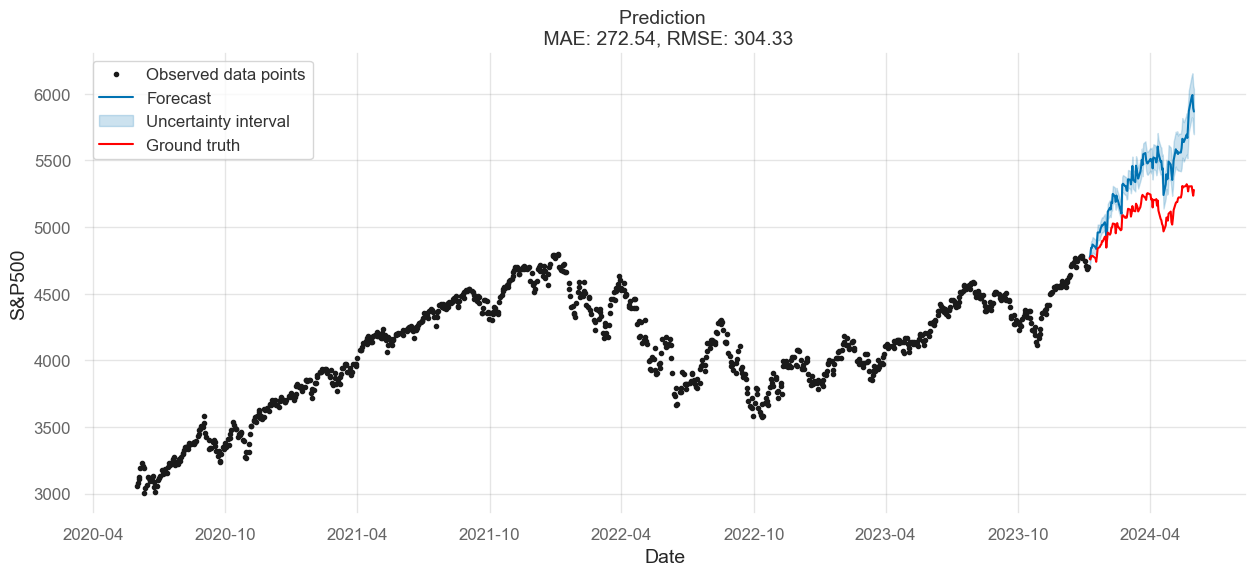

In [2882]:
# Plot the forecast
f2, ax2 = plt.subplots(1)
f2.set_figheight(6)
f2.set_figwidth(15)

model.plot(y_pred, ax=ax2)
sns.lineplot(x=x_test_date, y=y_test['y'], ax=ax2, color='red', label='Ground truth') 

ax2.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax2.set_xlabel(xlabel='Date', fontsize=14)
ax2.set_ylabel(ylabel='S&P500', fontsize=14)

plt.show()

In [2883]:
# Train the model
model_close = Prophet()
model_close.add_regressor('Close_Msft')
model_close.add_regressor('Close_Apple')
model_close.add_regressor('Close_Meta')
model_close.add_regressor('Close_Goog')
model_close.add_regressor('Close_Amz')
model_close.add_regressor('Close_Nvda')

# Fit the model with train set
model_close.fit(train_to_model[['ds','Close_Msft','Close_Apple','Close_Meta','Close_Goog','Close_Amz','Close_Nvda','y']])

# Predict on valid set
y_pred_close = model_close.predict(x_test_scaled)

# Calcuate metrics

score_mae = mean_absolute_error(y_test, y_pred_close['yhat'])
score_rmse = root_mean_squared_error(y_test, y_pred_close['yhat'])

print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))

00:25:59 - cmdstanpy - INFO - Chain [1] start processing
00:25:59 - cmdstanpy - INFO - Chain [1] done processing


MAE: 225.01949919558922
RMSE: 256.7621760216255


In [2884]:
y_pred_close

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_Amz,Close_Amz_lower,Close_Amz_upper,Close_Apple,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-08,3682.033313,4718.434543,4836.854465,3682.033313,3682.033313,12.187702,12.187702,12.187702,173.474352,...,133.816942,133.816942,133.816942,112.826668,112.826668,112.826668,0.0,0.0,0.0,4775.583762
1,2024-01-09,3681.601420,4741.108455,4857.762554,3681.601420,3681.601420,15.605842,15.605842,15.605842,171.499157,...,132.524519,132.524519,132.524519,112.856805,112.856805,112.856805,0.0,0.0,0.0,4796.731876
2,2024-01-10,3681.169528,4778.853576,4900.777998,3681.169528,3681.169528,19.159520,19.159520,19.159520,176.437182,...,132.960743,132.960743,132.960743,112.265832,112.265832,112.265832,0.0,0.0,0.0,4837.860822
3,2024-01-11,3680.737635,4779.845955,4897.075112,3680.737635,3680.737635,21.342919,21.342919,21.342919,173.615433,...,130.926134,130.926134,130.926134,111.086540,111.086540,111.086540,0.0,0.0,0.0,4840.888243
4,2024-01-12,3680.305742,4782.593242,4905.708436,3680.305742,3680.305742,20.499677,20.499677,20.499677,175.167387,...,134.594269,134.594269,134.594269,109.362517,109.362517,109.362517,0.0,0.0,0.0,4846.980741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2024-05-24,3622.863987,5632.074099,5955.639879,3474.354325,3768.646423,59.846124,59.846124,59.846124,194.261016,...,134.594269,134.594269,134.594269,26.673172,26.673172,26.673172,0.0,0.0,0.0,5794.527591
97,2024-05-28,3621.136416,5748.967856,6081.188720,3469.416623,3769.299133,61.954228,61.954228,61.954228,194.308091,...,132.524519,132.524519,132.524519,23.526719,23.526719,23.526719,0.0,0.0,0.0,5918.300943
98,2024-05-29,3620.704523,5761.664870,6079.942560,3465.334699,3771.128901,61.758491,61.758491,61.758491,195.718893,...,132.960743,132.960743,132.960743,21.928222,21.928222,21.928222,0.0,0.0,0.0,5927.462763
99,2024-05-30,3620.272630,5658.665881,5980.669384,3461.631043,3773.115880,57.692847,57.692847,57.692847,200.421761,...,130.926134,130.926134,130.926134,19.946479,19.946479,19.946479,0.0,0.0,0.0,5831.299721


c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Adrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



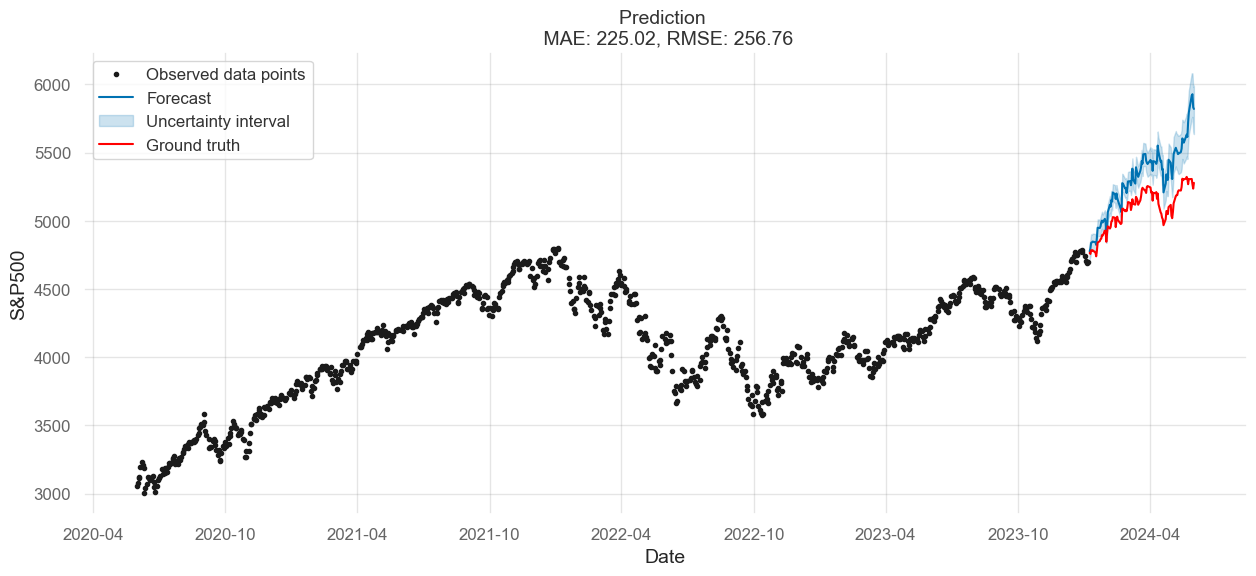

In [2885]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_close.plot(y_pred_close, ax=ax)
sns.lineplot(x=x_test_date, y=y_test['y'], ax=ax, color='red', label='Ground truth') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='S&P500', fontsize=14)

plt.show()